In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np

import IPython.display as ipd
from matplotlib import pyplot as plt
import seaborn as sns

import librosa # package for music and audio processing, & features extraction 
import os, shutil, glob

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
path_colab = 'drive/My Drive/zindi/'
path_jupyt = './'

# set to True with colab or False with jupyter
colab = True
path = path_colab if colab else path_jupyt

## Take a look at the submission 

In [4]:
sub = pd.read_csv(path + 'SampleSubmission.csv')

# retrieve all the class names in a list (the 1st col is the id)
birds = sub.columns[1:]

# add a col with all files' paths 
sub['file_path'] = path + 'Test/' + sub['ID'] + '.mp3'
sub.head()

,ID,Ring-necked Dove,Black Cuckoo,Red-chested Cuckoo,Fiery-necked Nightjar,Green Wood Hoopoe,Crested Barbet,Cape Batis,Olive Bushshrike,Orange-breasted Bushshrike,Bokmakierie,Black-backed Puffback,Southern Boubou,Black-headed Oriole,Fork-tailed Drongo,African Paradise Flycatcher,Sabota Lark,Eastern Clapper Lark,Rufous-naped Lark,Dark-capped Bulbul,Sombre Greenbul,Long-billed Crombec,African Reed Warbler,Rattling Cisticola,Levaillants Cisticola,Tawny-flanked Prinia,Karoo Prinia,Bar-throated Apalis,Green-backed Camaroptera,Chestnut-vented Warbler,Cape White-eye,Karoo Scrub Robin,White-browed Scrub Robin,Cape Robin-Chat,White-browed Robin-Chat,Chorister Robin-Chat,Southern Double-collared Sunbird,White-bellied Sunbird,African Pipit,African Rock Pipit,Cape Bunting,file_path
0,019OYB,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,drive/My Drive/zindi/Test/019OYB.mp3
1,01S9OX,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,drive/My Drive/zindi/Test/01S9OX.mp3
2,02CS12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,drive/My Drive/zindi/Test/02CS12.mp3
3,02LM3W,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,drive/My Drive/zindi/Test/02LM3W.mp3
4,0C3A2V,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,drive/My Drive/zindi/Test/0C3A2V.mp3


List of species:

In [5]:
birds.values

array(['Ring-necked Dove', 'Black Cuckoo', 'Red-chested Cuckoo',
       'Fiery-necked Nightjar', 'Green Wood Hoopoe', 'Crested Barbet',
       'Cape Batis', 'Olive Bushshrike', 'Orange-breasted Bushshrike',
       'Bokmakierie', 'Black-backed Puffback', 'Southern Boubou',
       'Black-headed Oriole', 'Fork-tailed Drongo',
       'African Paradise Flycatcher', 'Sabota Lark',
       'Eastern Clapper Lark', 'Rufous-naped Lark', 'Dark-capped Bulbul',
       'Sombre Greenbul', 'Long-billed Crombec', 'African Reed Warbler',
       'Rattling Cisticola', 'Levaillants Cisticola',
       'Tawny-flanked Prinia', 'Karoo Prinia', 'Bar-throated Apalis',
       'Green-backed Camaroptera', 'Chestnut-vented Warbler',
       'Cape White-eye', 'Karoo Scrub Robin', 'White-browed Scrub Robin',
       'Cape Robin-Chat', 'White-browed Robin-Chat',
       'Chorister Robin-Chat', 'Southern Double-collared Sunbird',
       'White-bellied Sunbird', 'African Pipit', 'African Rock Pipit',
       'Cape Bunting'], 

In [6]:
# check if ID are alphabetically ordered
col_id = list(sub['ID'].values)
col_id == sorted(list(sub['ID'].values))

True

In [7]:
sub['len'] = sub['ID'].apply(lambda x: len(x))
sub['len'].value_counts()

6    911
Name: len, dtype: int64

In [8]:
nb_class = len(birds)
nb_class

40

## The train dataset & images

In [21]:
# same thing with train
train = pd.read_csv(path + 'Train.csv')
train['file_path'] = path + 'Train/' + train['ID'] + '.mp3'
train.head()

,ID,common_name,file_path
0,MBMG2C,Ring-necked Dove,drive/My Drive/zindi/Train/MBMG2C.mp3
1,K8LJSB,Ring-necked Dove,drive/My Drive/zindi/Train/K8LJSB.mp3
2,OGD9L6,Ring-necked Dove,drive/My Drive/zindi/Train/OGD9L6.mp3
3,581PCQ,Ring-necked Dove,drive/My Drive/zindi/Train/581PCQ.mp3
4,P91M1F,Ring-necked Dove,drive/My Drive/zindi/Train/P91M1F.mp3


In [0]:
#train['file_path'] = path + 'Spectrograms_1_Train/' + train['ID'] + '.png'
#train.head()

# Infos on the tracks duration

In [29]:
def get_audio_duration(file_path):
    """Load an audio file and returns its duration"""
    y, sr = librosa.load(file_path)
    return librosa.get_duration(y=y, sr=sr)



new_train_csv = path + 'Train_with_duration.csv'
if os.path.isfile(new_train_csv):
    train = pd.read_csv(new_train_csv)
else:
    # tried this but takes a huge amount of time
    # train['duration'] = train['file_path'].apply(lambda x: get_audio_duration(x))
    l = []
    for f in train['file_path'].values:
          y, sr = librosa.load(f)
          l.append(librosa.get_duration(y=y, sr=sr))
    train['duration'] = [round(t) for t in l]
    train.to_csv(new_train_csv)


train.head()

,ID,common_name,file_path,duration
0,MBMG2C,Ring-necked Dove,drive/My Drive/zindi/Train/MBMG2C.mp3,16
1,K8LJSB,Ring-necked Dove,drive/My Drive/zindi/Train/K8LJSB.mp3,12
2,OGD9L6,Ring-necked Dove,drive/My Drive/zindi/Train/OGD9L6.mp3,70
3,581PCQ,Ring-necked Dove,drive/My Drive/zindi/Train/581PCQ.mp3,21
4,P91M1F,Ring-necked Dove,drive/My Drive/zindi/Train/P91M1F.mp3,39


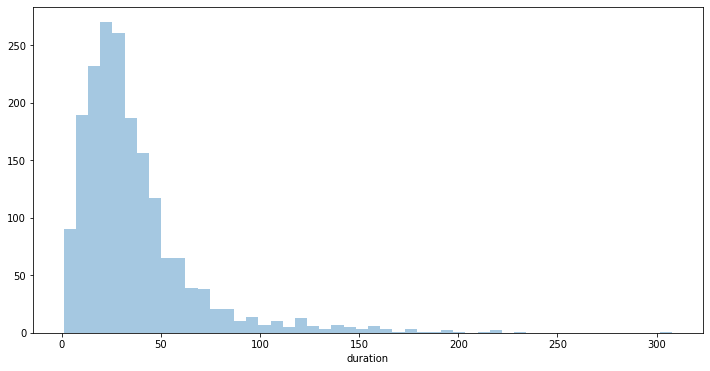

In [37]:
plt.figure(figsize=(12, 6))
sns.distplot(train['duration'], kde=False, rug=False);

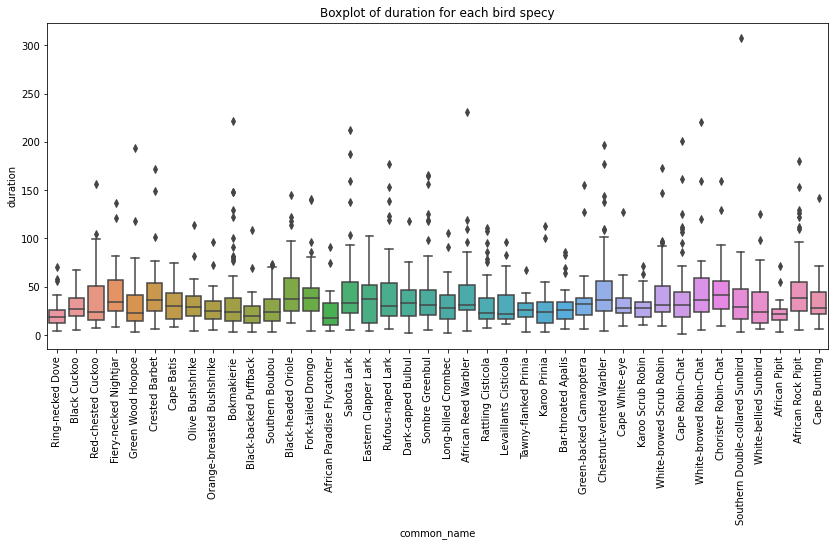

In [41]:
plt.figure(figsize=(14, 6))
plt.xticks(rotation=90)
plt.title('Boxplot of duration for each bird specy')
sns.boxplot(x='common_name', y="duration", data=train)   

In [44]:
train[train['duration'] <= 5].shape[0]

55